In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import os, sys
import tqdm
import matplotlib as mpl
import pandas as pd
import math

mpl.rcParams["figure.figsize"] = (10, 8)
mpl.rcParams["figure.dpi"] = 300

In [11]:
files = ["./rfs-runtimes.csv", "./contract-runtimes.csv", "./postord-runtimes.csv"]
headers = ["Robinson-Foulds Distance", "tree contraction", "postorder traversal"]

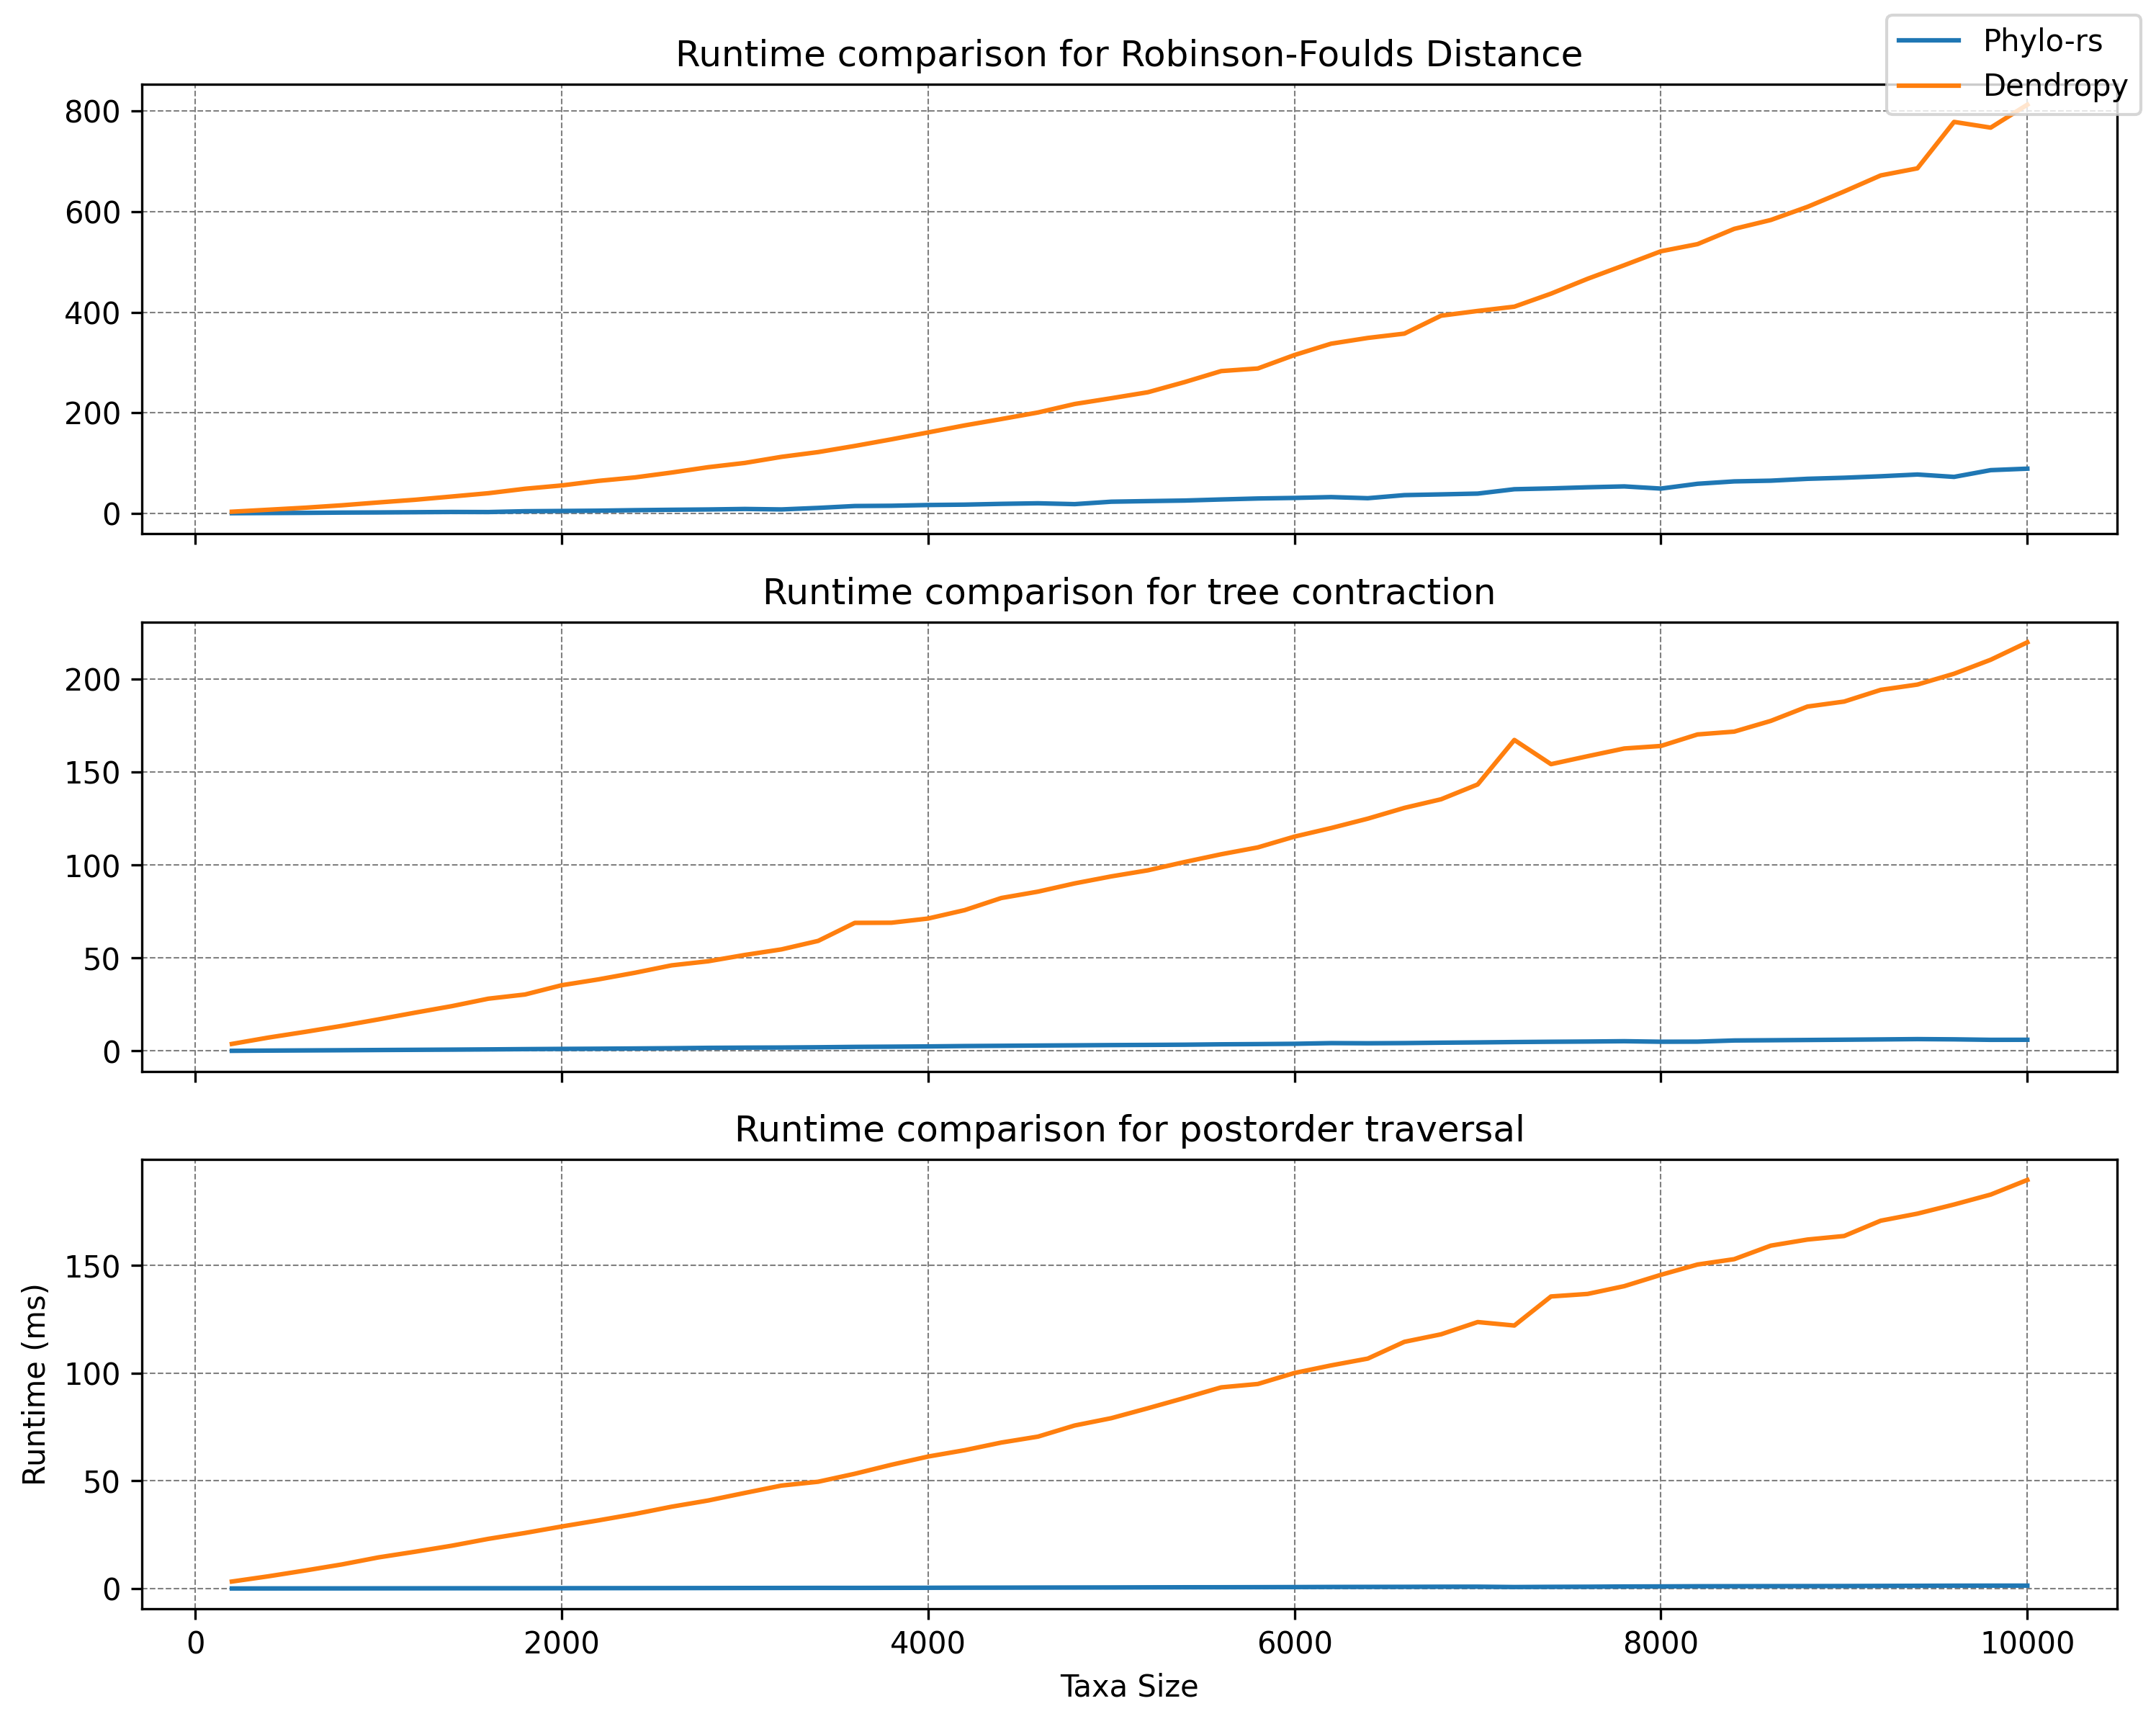

In [26]:
fig, ax = plt.subplots(3,1, sharex=True)
handles, labels = [], []

for n, (file, header) in enumerate(zip(files, headers)):
    # file = "./rfs-runtimes.csv"
    df = pd.read_csv(file)
    data = {"Phylo-rs": df["phylo-rs"].values, "Dendropy": df["dendropy"].values}
    
    for key,val in data.items():
        ax[n].set_title(f"Runtime comparison for {header}")
        line = ax[n].plot(range(200, 10001, 200), val, label=f"{key}")
        ax[n].grid(color='gray', linewidth=0.5, linestyle="--")
        handles.append(line)
        labels.append(f"{key}")
    plt.xlabel("Taxa Size")
    plt.ylabel("Runtime (ms)")
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.tight_layout()
    
plt.savefig("all-runtime.png")

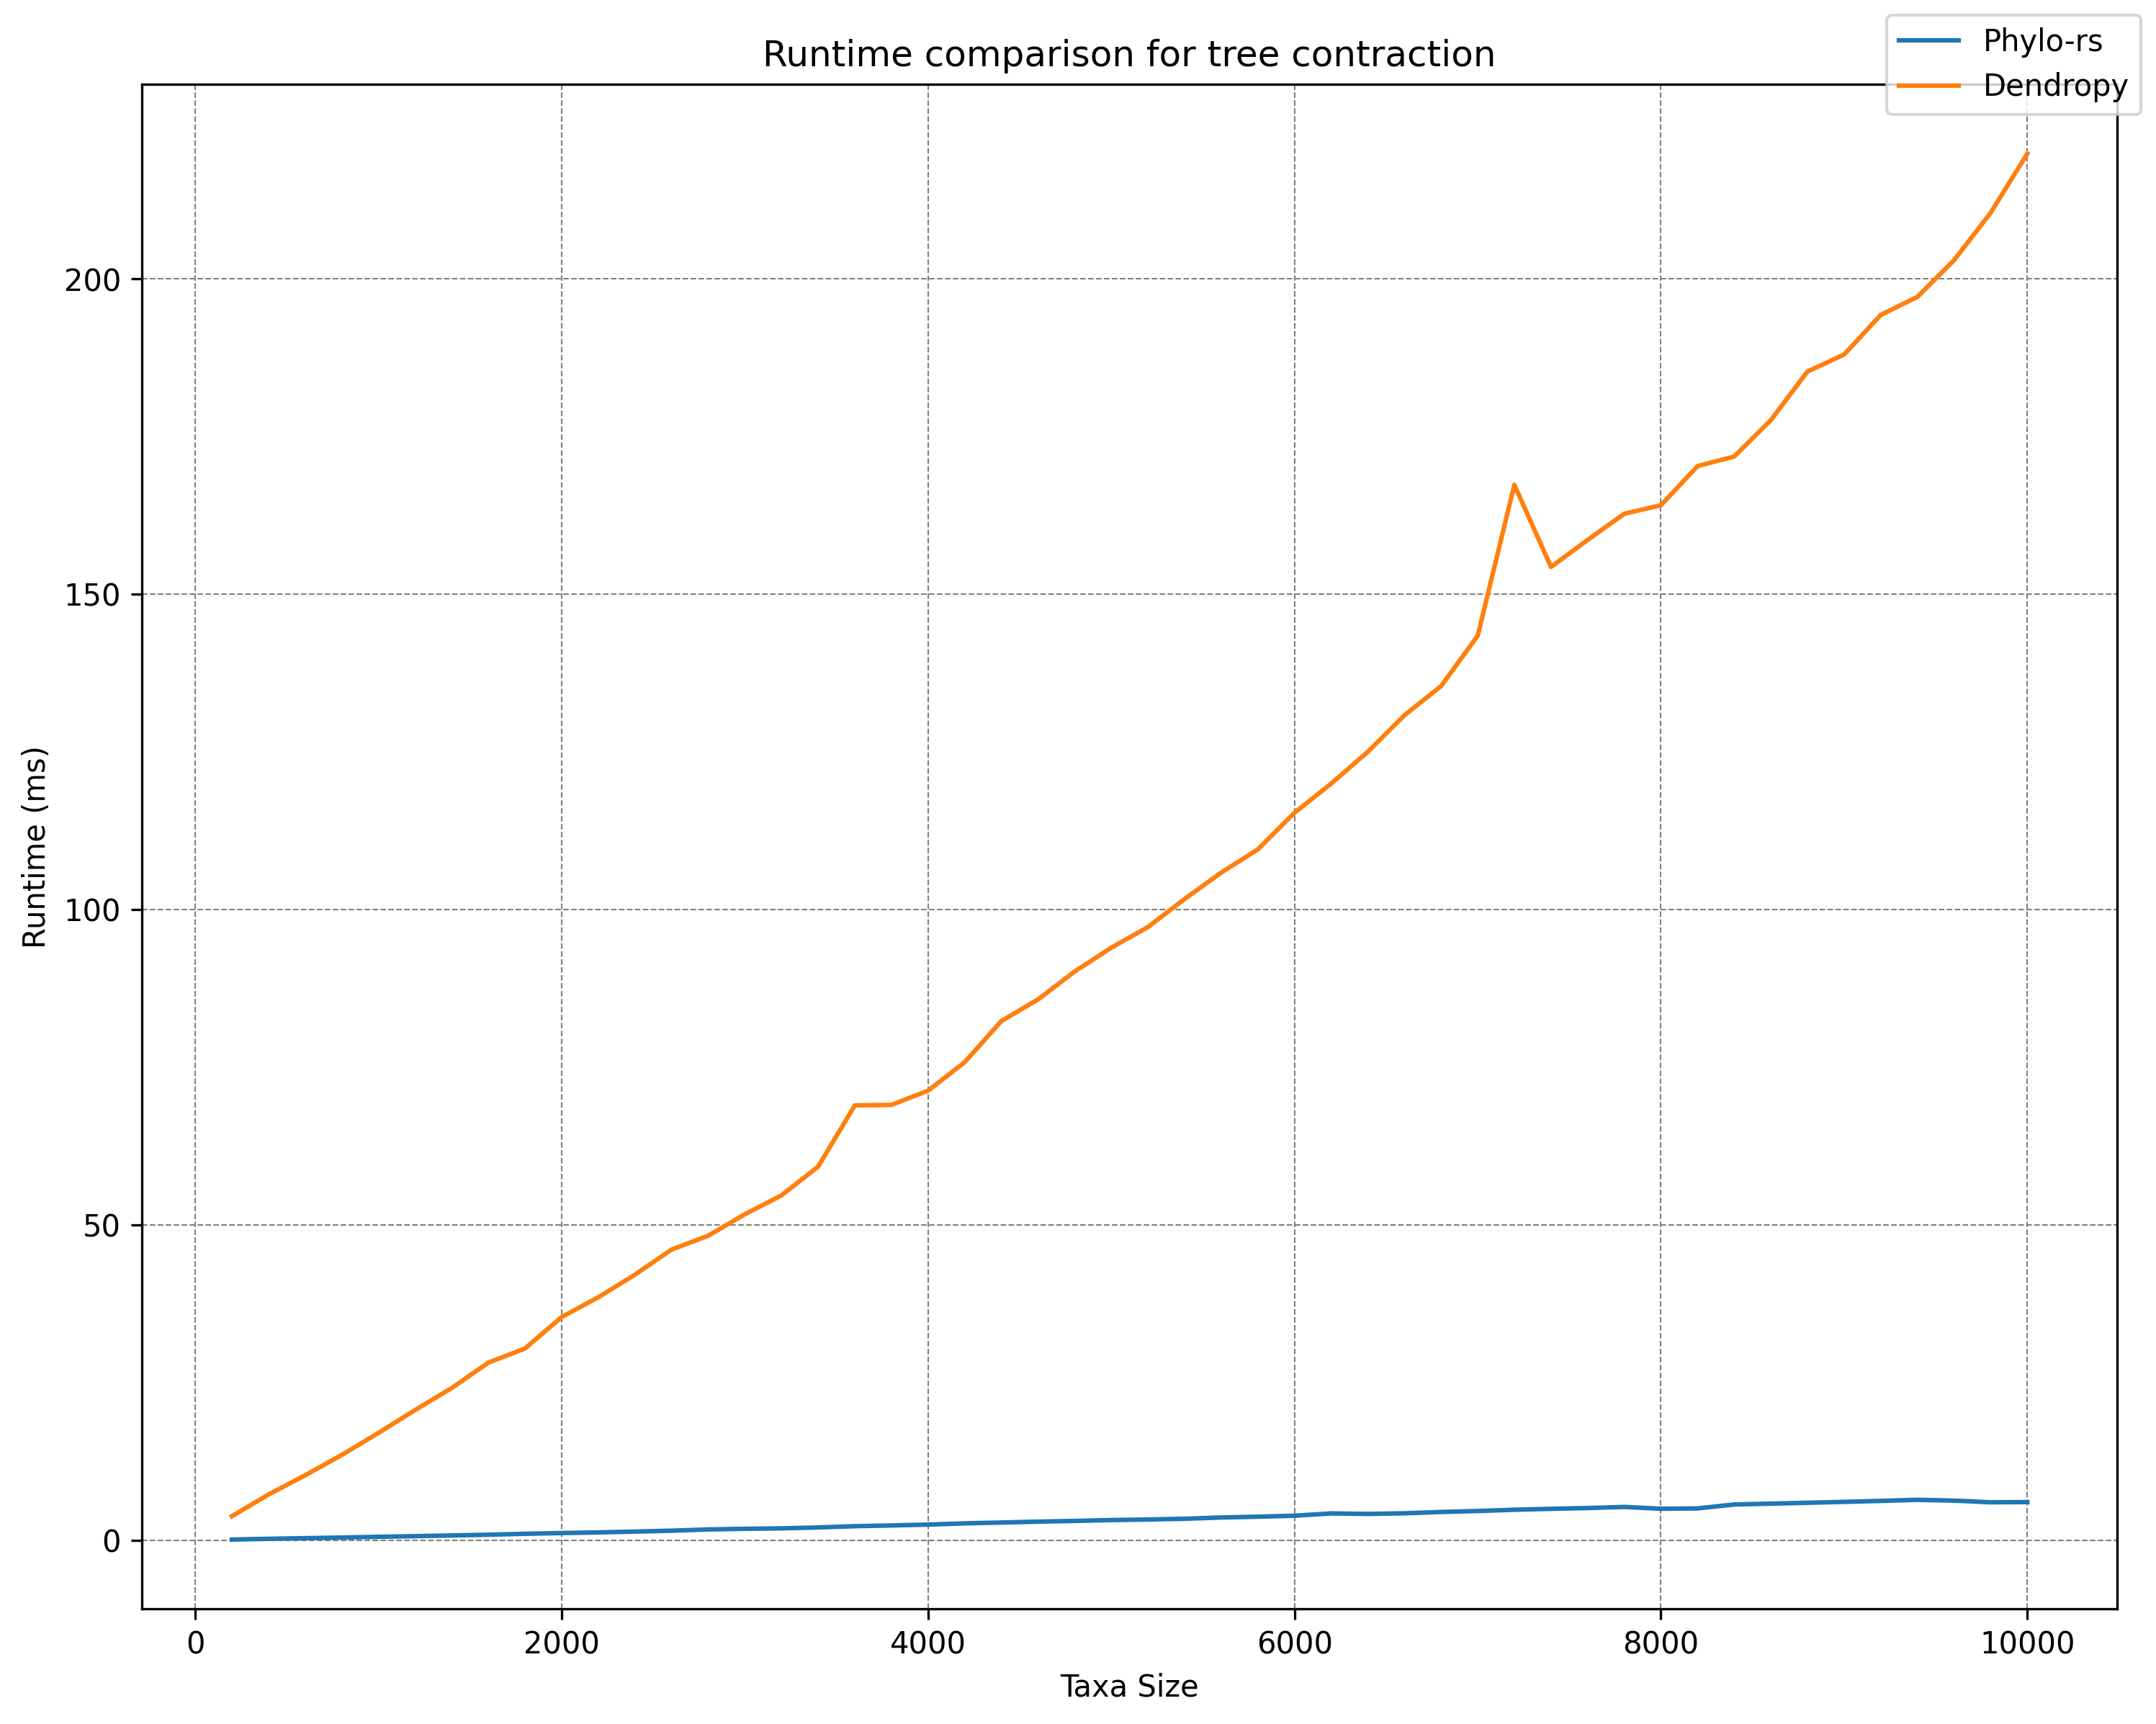

In [8]:
file = "./contract-runtimes.csv"
df = pd.read_csv(file)
data = {"Phylo-rs": df["phylo-rs"].values, "Dendropy": df["dendropy"].values}

fig, ax = plt.subplots(1,1)
for key,val in data.items():
    ax.set_title(f"Runtime comparison for tree contraction")
    ax.plot(range(200, 10001, 200), val, label=f"{key}")
    ax.grid(color='gray', linewidth=0.5, linestyle="--")
plt.xlabel("Taxa Size")
plt.ylabel("Runtime (ms)")
fig.legend()
fig.tight_layout()

plt.savefig("-runtime.png")

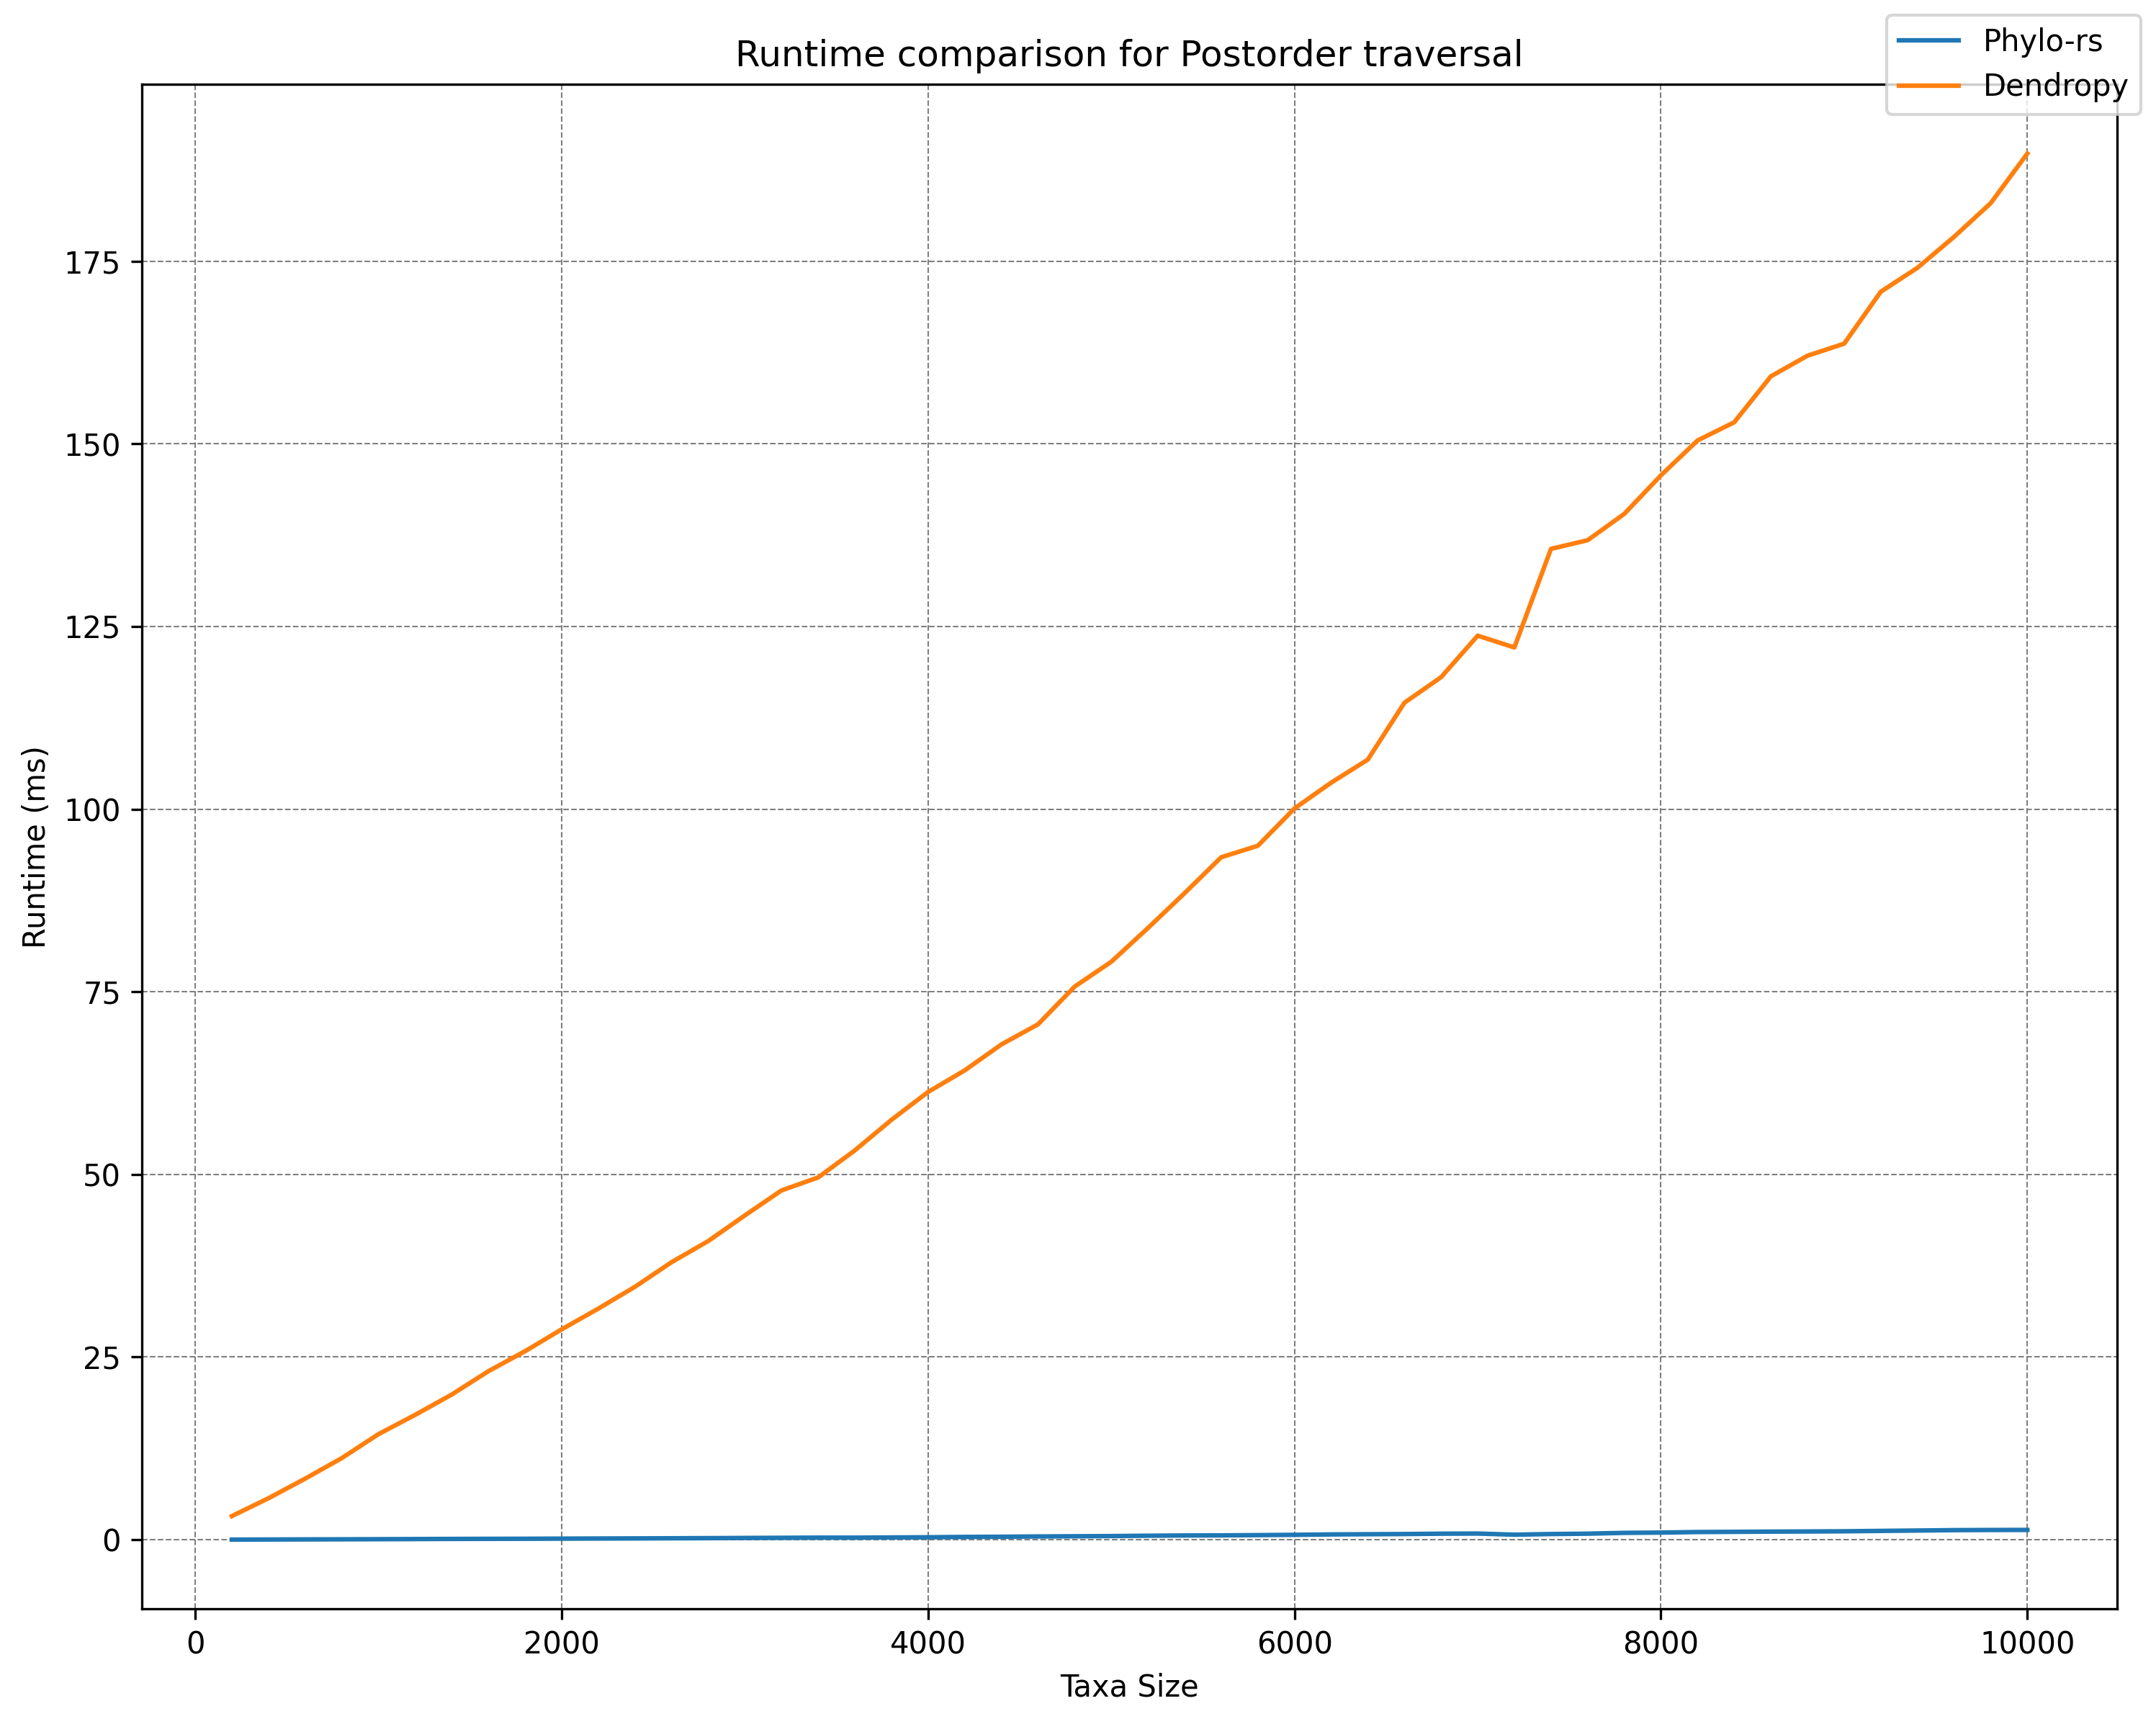

In [9]:
file = "./postord-runtimes.csv"
df = pd.read_csv(file)
data = {"Phylo-rs": df["phylo-rs"].values, "Dendropy": df["dendropy"].values}

fig, ax = plt.subplots(1,1)
for key,val in data.items():
    ax.set_title(f"Runtime comparison for Postorder traversal")
    ax.plot(range(200, 10001, 200), val, label=f"{key}")
    ax.grid(color='gray', linewidth=0.5, linestyle="--")
plt.xlabel("Taxa Size")
plt.ylabel("Runtime (ms)")
fig.legend()
fig.tight_layout()

plt.savefig("postord-runtime.png")